In [1]:
import numpy as np
import pandas as pd
import requests
import cv2
import matplotlib.pyplot as plt

In [2]:
heading = ['colour','colour_name','hex','r','g','b']
df=pd.read_csv("colors.csv",names=heading,header=None)

In [3]:
df.head()

,colour,colour_name,hex,r,g,b
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255


In [4]:
df.shape

(865, 6)

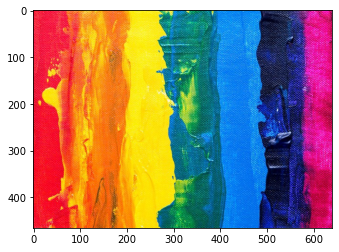

In [5]:
img = cv2.imread('colortest.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
img_path = 'colortest.jpeg'

img = cv2.imread(img_path)
img = cv2.resize(img, (800,600))

clicked = False
r = g = b = xpos = ypos = 0

def get_color_name(R,G,B):
    url = f'http://thecolorapi.com/id?rgb={R},{G},{B}&format=json'
    print(url)
    r = requests.get(url)
    return r.json()['name']['value']

def draw_function(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b, g, r, xpos, ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)

# creating window
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_function)

while True:
    cv2.imshow('image', img)
    if clicked:
        
        cv2.rectangle(img, (20,20), (600,60), (b,g,r), -1)

        text = get_color_name(r,g,b) + ' R=' + str(r) + ' G=' + str(g) + ' B=' + str(b)

        if r+g+b >=600:
            cv2.putText(img, text, (50,50), 2,0.8, (0,0,0),2,cv2.LINE_AA)
        else:
            cv2.putText(img, text, (50,50), 2,0.8, (255,255,255),2,cv2.LINE_AA)

        clicked = False

    if cv2.waitKey(15) & 0xFF == 27:
        break

cv2.destroyAllWindows()

http://thecolorapi.com/id?rgb=253,27,56&format=json
http://thecolorapi.com/id?rgb=7,124,237&format=json
http://thecolorapi.com/id?rgb=231,23,160&format=json
